## Customer Churn Prediction Using Artificial Neural Network (ANN)

Customer churn prediction is to measure why customers are leaving a business. 

Here,we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 

In [3]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6499,2676-ISHSF,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,20.3,No
4132,6834-NXDCA,Female,0,No,No,13,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.90,300.8,Yes
4895,1394-SUIUH,Female,1,Yes,No,44,Yes,No,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,85.15,3670.5,No
4552,1385-TQOZW,Female,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.45,147.55,No
6086,0916-KNFAJ,Male,0,Yes,No,61,Yes,Yes,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Mailed check,69.90,4226.7,No


In [4]:
df.drop('customerID', axis='columns', inplace = True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#Total charges object? 

df.TotalCharges.values # Here you see that they are number  so we have to fix this.   

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**Remove rows with space in TotalCharges**

In [15]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [18]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [19]:
df1.dtypes #Now it has been converted to float 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### Tenure - The higher the years/months the more loyal

How many of the loyal customers are leaving? 

In [23]:
tenure_churn_no = df1[df1.Churn=='No'].tenure

tenure_churn_no #This shows the tenure values for customers who have not churned 

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [24]:
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
tenure_churn_yes 

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

##### Now we need to visualise these results of the relationship between tenure and churn 

Histogram showing whether the loyal customers leave or stay

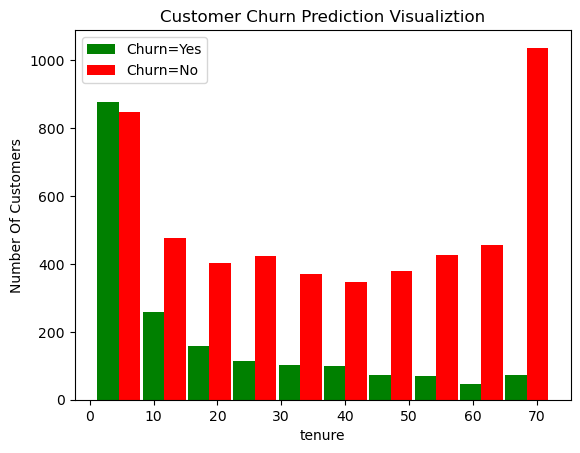

In [25]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

People with a high tenure of not leaving 

##### Now we need to visualise these results of the relationship between charges and churn 

Histogram showing whether the customers with high charges leave or stay

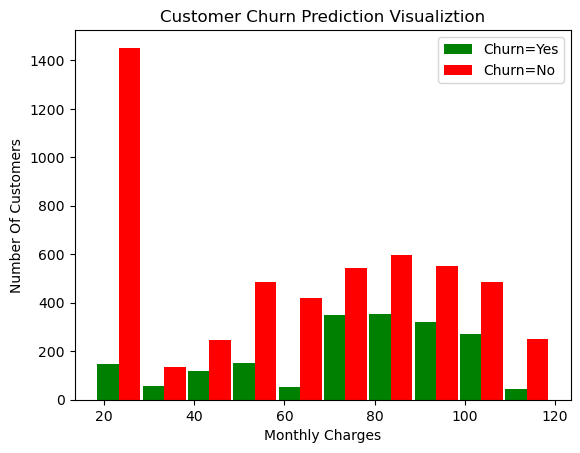

In [26]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

People with high charges are leaving more compared with those with lower charges 

#### More pre-processing of the dataset

Let's print unique values in object columns to see data values 

In [28]:
def print_unique_col_values(df): 
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}: {df[column].unique()}')

In [29]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


##### Objects like no internet service should be replaced with No 

In [30]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [31]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [32]:
#Replacing all the columns with yes , no to 1 and 0 


yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']


for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [33]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [36]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [37]:
df1.gender.unique()

array([1, 0])

#### For other columns that have multiple categorical values (categorical columns) we will apply  **One hot encoding**

**Dummies** 

In [39]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [41]:
df2.sample(5) #randomly sample a few rows 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4812,1,0,0,0,9,1,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
4327,1,0,0,0,7,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
3225,1,0,0,0,13,1,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
3451,0,1,1,0,65,1,0,0,0,0,...,False,True,False,False,True,False,True,False,False,False
2305,0,0,1,1,34,1,1,0,1,0,...,False,True,False,True,False,False,True,False,False,False


In [42]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

#### Data Scaling

In [43]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [44]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

##### Train test split

In [46]:
X = df2.drop('Churn',axis='columns') #Features 

y = df2['Churn'] #Label 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [47]:
X_train.shape

(5625, 26)

In [48]:
X_test.shape

(1407, 26)

In [49]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
101,1,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
2621,0,0,1,0,0.985915,1,0,0,1,1,...,True,False,False,False,False,True,False,True,False,False
392,1,1,0,0,0.014085,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1327,0,0,1,0,0.816901,1,1,0,0,1,...,False,True,False,False,True,False,True,False,False,False
3607,1,0,0,0,0.169014,1,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
2773,0,0,1,0,0.323944,0,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1936,1,0,1,0,0.704225,1,0,1,1,0,...,True,False,False,False,True,False,True,False,False,False
5387,0,0,0,0,0.042254,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
4331,0,0,0,0,0.985915,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False


In [50]:
len(X_train.columns)

26

#### Build a model (ANN) in tensorflow/keras 

In [51]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'), #20 neurons for the first hidden layer, same as columns, input shape also 26
    keras.layers.Dense(15, activation='relu'), #15 neurons in the second hidden layer 
    keras.layers.Dense(1, activation='sigmoid') #output layer with sigmoid function. Binary classification.
                                                # We are calculating the probability of one class, which is either yes or no. 
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100) # Start with 5 epochs. If your model accuracy is still low after 5 then play around with parameters  

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - accuracy: 0.7515 - loss: 0.5347
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.7971 - loss: 0.4242
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.7959 - loss: 0.4209
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8098 - loss: 0.4037
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.7965 - loss: 0.4259
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8018 - loss: 0.4211
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.8129 - loss: 0.4039
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.8063 - loss: 0.4075
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.8013 - loss: 0.4148
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8037 - loss: 0.4067
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8063 - loss: 0.4010
Epoch 12/100
176/176 ━━━━━━━━━━

In [52]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.7812 - loss: 0.4852


[0.4992017149925232, 0.7683013677597046]

In [53]:
#greater than 0.5 = yes 

yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step


array([[0.2548861 ],
       [0.5980747 ],
       [0.00825974],
       [0.8863827 ],
       [0.5773656 ]], dtype=float32)

In [54]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

Now what we want to do is to convert the predictions(y_pred) from x-test data 0 or 1 for easier interpretation 


In [55]:

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [56]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [57]:
y_test[:10] 

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

We can see that the model is performing fairly well in making the predictions. Of the first 10 predictions, the model got 10 correct 

##### Now to visualise the correct predictions for all the test samples we need to do a classification report 

In [58]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       999
           1       0.63      0.47      0.54       408

    accuracy                           0.77      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

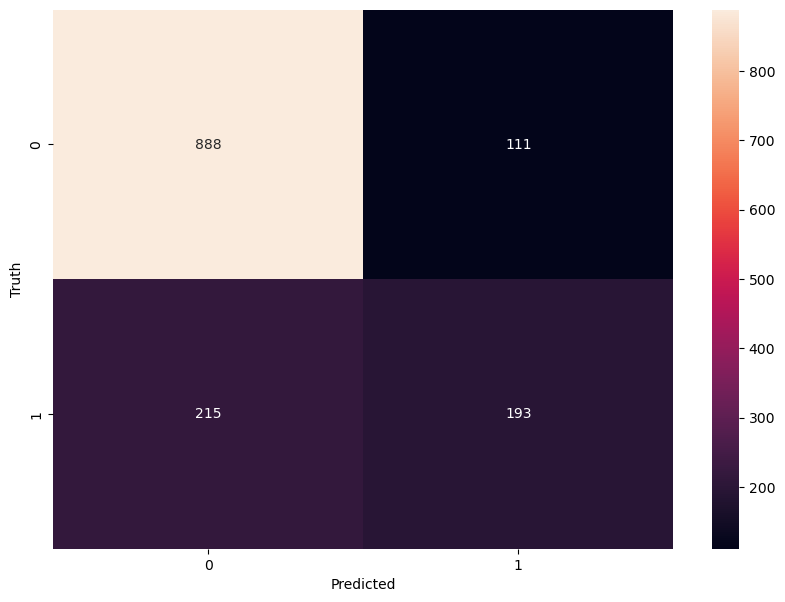

In [59]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Data is not balanced- F1 score shows that the model is better at predicting class 0 compared to 1

For tabular data, ML methods like Decision Trees, Random forests and XGboost might perform better than deep learning methods 